Results of Dickey-Fuller Test:
Test Statistic                    -0.034112
p-value                            0.955618
#Lags Used                        37.000000
Number of Observations Used    15380.000000
Critical Value (1%)               -3.430775
Critical Value (5%)               -2.861728
Critical Value (10%)              -2.566870
dtype: float64


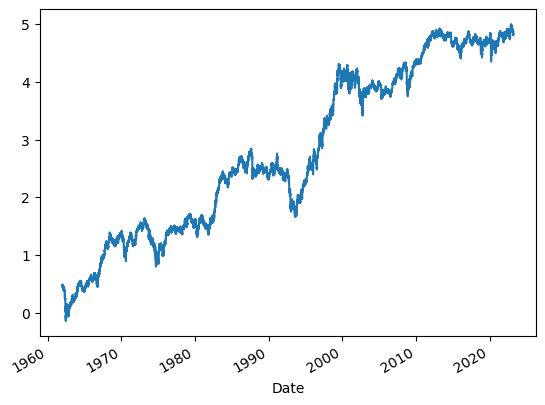

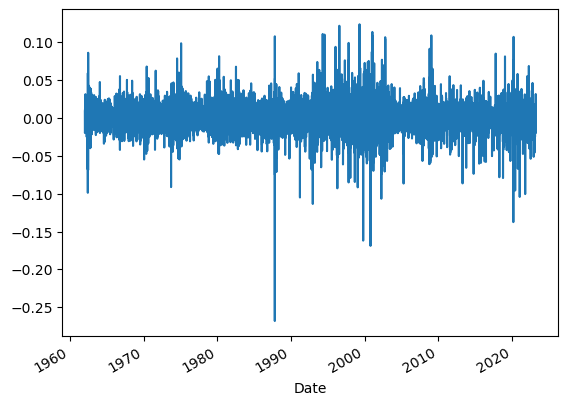

Results of Dickey-Fuller Test:
Test Statistic                   -25.395531
p-value                            0.000000
#Lags Used                        25.000000
Number of Observations Used    15391.000000
Critical Value (1%)               -3.430775
Critical Value (5%)               -2.861728
Critical Value (10%)              -2.566870
dtype: float64


In [4]:
import requests
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

IBM_yf = yf.Ticker('IBM')
IBM_hist = IBM_yf.history(period='max')

def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
test_stationarity(IBM_hist['Close'])

IBM_hist_log = np.log(IBM_hist.Close)
IBM_hist_log.plot()
plt.show()

IBM_hist_log_diff = IBM_hist_log.diff(periods=1)
IBM_hist_log_diff.plot()
plt.show()

test_stationarity(IBM_hist_log_diff.dropna(inplace=False))

#After removing heterodasticity and trend, the residues show a p-value below 0,05. Therefore, we can reject that the resulting series is not stationary and affirm that the residues after removing heterodasticity and trend are stationary.